## Linear Regression using StatsModels

### Import Libraries

#### Import Data Analysis

In [1]:
import pandas as pd
import numpy as np

#### Import Visualization

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
plt.figure(figsize=(16, 10))

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

#### Import StatsModels for TimeSeries Analysis

In [5]:
import statsmodels.api as sm


In [6]:
sm.__version__

'0.12.0'

#### Import StatsModels load data and parse into Pandas

In [7]:
raw_df = sm.datasets.macrodata.load_pandas().data
raw_df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [8]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

##### Export to_csv

In [10]:
raw_df.to_csv('./data/sm_macro_data.csv', index=False)

##### Import Csv

In [11]:
macro_df = pd.read_csv('./data/sm_macro_data.csv', parse_dates=['year'])
macro_df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [12]:
macro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      203 non-null    object 
 1   quarter   203 non-null    float64
 2   realgdp   203 non-null    float64
 3   realcons  203 non-null    float64
 4   realinv   203 non-null    float64
 5   realgovt  203 non-null    float64
 6   realdpi   203 non-null    float64
 7   cpi       203 non-null    float64
 8   m1        203 non-null    float64
 9   tbilrate  203 non-null    float64
 10  unemp     203 non-null    float64
 11  pop       203 non-null    float64
 12  infl      203 non-null    float64
 13  realint   203 non-null    float64
dtypes: float64(13), object(1)
memory usage: 22.3+ KB


##### Need to convert to float then int

In [13]:
macro_df['year'] = macro_df['year'].astype(float)
macro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      203 non-null    float64
 1   quarter   203 non-null    float64
 2   realgdp   203 non-null    float64
 3   realcons  203 non-null    float64
 4   realinv   203 non-null    float64
 5   realgovt  203 non-null    float64
 6   realdpi   203 non-null    float64
 7   cpi       203 non-null    float64
 8   m1        203 non-null    float64
 9   tbilrate  203 non-null    float64
 10  unemp     203 non-null    float64
 11  pop       203 non-null    float64
 12  infl      203 non-null    float64
 13  realint   203 non-null    float64
dtypes: float64(14)
memory usage: 22.3 KB


In [14]:
macro_df['year'] = macro_df['year'].astype(int)
macro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      203 non-null    int32  
 1   quarter   203 non-null    float64
 2   realgdp   203 non-null    float64
 3   realcons  203 non-null    float64
 4   realinv   203 non-null    float64
 5   realgovt  203 non-null    float64
 6   realdpi   203 non-null    float64
 7   cpi       203 non-null    float64
 8   m1        203 non-null    float64
 9   tbilrate  203 non-null    float64
 10  unemp     203 non-null    float64
 11  pop       203 non-null    float64
 12  infl      203 non-null    float64
 13  realint   203 non-null    float64
dtypes: float64(13), int32(1)
memory usage: 21.5 KB


In [15]:
macro_df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [17]:
index = pd.Index( sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))

In [18]:
macro_df.index = index

In [19]:
macro_df.tail()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
2008-09-30,2008,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,2008,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,2009,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,2009,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19
2009-09-30,2009,3.0,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44


In [20]:
macro_df.to_csv('./data/macro_df_index.csv')

In [21]:
index_df = pd.read_csv('../PractiseFiles/data/macro_df_index.csv', index_col=[0])

In [22]:
index_df.tail()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
2008-09-30,2008,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,2008,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,2009,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,2009,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19
2009-09-30,2009,3.0,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44


In [23]:
index_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 1959-03-31 to 2009-09-30
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      203 non-null    int64  
 1   quarter   203 non-null    float64
 2   realgdp   203 non-null    float64
 3   realcons  203 non-null    float64
 4   realinv   203 non-null    float64
 5   realgovt  203 non-null    float64
 6   realdpi   203 non-null    float64
 7   cpi       203 non-null    float64
 8   m1        203 non-null    float64
 9   tbilrate  203 non-null    float64
 10  unemp     203 non-null    float64
 11  pop       203 non-null    float64
 12  infl      203 non-null    float64
 13  realint   203 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 23.8+ KB


D:\Mark\anaconda3\envs\finance-venv\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 1.0, 'Trend of Private Domestic Investment and Government Expenditure')

<Figure size 1440x720 with 0 Axes>

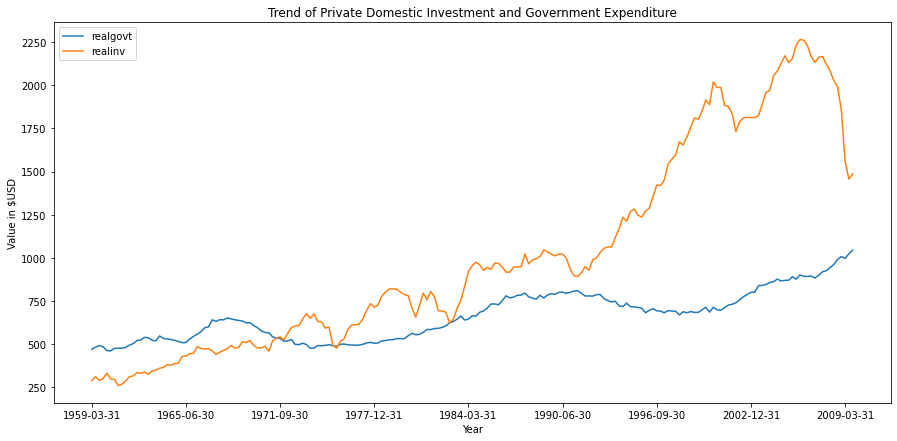

In [45]:
plt.figure(figsize=(20, 10))
index_df[['realgovt', 'realinv']].plot(figsize=(15,7))
plt.xlabel('Year')
plt.ylabel('Value in $USD')
plt.title('Trend of Private Domestic Investment and Government Expenditure')

### Linear Regression of realgovt and realinv

#### Is there a correlation between realinv and realgovt

In [25]:
index_df[['realgovt', 'realinv']].corr()

,realgovt,realinv
realgovt,1.000000,0.794797
realinv,0.794797,1.000000


##### -a 0.79 correlation hence a 79% correlation between realgovt and realinv

#### Can we performa a linear regression?

capture federal consumption expenditureand gross investment index_df['realgovt'] from X of index_df['realinv'] i.e private domestic investment

In [26]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [27]:
X = sm.add_constant(index_df['realgovt'])
y = index_df['realinv']

In [28]:
X.head()

,const,realgovt
1959-03-31,1.0,470.045
1959-06-30,1.0,481.301
1959-09-30,1.0,491.260
1959-12-31,1.0,484.052
1960-03-31,1.0,462.199


In [29]:
y

1959-03-31     286.898
1959-06-30     310.859
1959-09-30     289.226
1959-12-31     299.356
1960-03-31     331.722
                ...   
2008-09-30    1990.693
2008-12-31    1857.661
2009-03-31    1558.494
2009-06-30    1456.678
2009-09-30    1486.398
Name: realinv, Length: 203, dtype: float64

In [30]:
model = sm.OLS(y, X)

In [31]:
model

In [32]:
results = model.fit()

In [33]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                realinv   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     344.8
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           1.78e-45
Time:                        12:48:40   Log-Likelihood:                -1479.6
No. Observations:                 203   AIC:                             2963.
Df Residuals:                     201   BIC:                             2970.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1177.0037    120.558     -9.763      0.0

In [34]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.630     
Dependent Variable: realinv          AIC:                2963.2626 
Date:               2020-09-23 12:48 BIC:                2969.8890 
No. Observations:   203              Log-Likelihood:     -1479.6   
Df Model:           1                F-statistic:        344.8     
Df Residuals:       201              Prob (F-statistic): 1.78e-45  
R-squared:          0.632            Scale:              1.2671e+05
-------------------------------------------------------------------
              Coef.    Std.Err.    t    P>|t|    [0.025     0.975] 
-------------------------------------------------------------------
const       -1177.0037 120.5577 -9.7630 0.0000 -1414.7238 -939.2836
realgovt        3.3013   0.1778 18.5676 0.0000     2.9507    3.6519
-------------------------------------------------------------------
Omnibus:                8.118        Durbin-Watson:           0.032
Prob(Omnibus):          0.017        Jarque-Bera (JB):        6.521
Skew:                   0.342        Prob(JB):                0.038
Kurtosis:               2.449        Condition No.:           3272 
===================================================================
* The condition number is large (3e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [35]:
results.f_pvalue

1.7835845286436183e-45

In [36]:
results.condition_number

3271.867803473453

In [37]:
results.outlier_test(method='bonf')

,student_resid,unadj_p,bonf(p)
1959-03-31,-0.248053,0.804348,1.0
1959-06-30,-0.285173,0.775807,1.0
1959-09-30,-0.438902,0.661206,1.0
1959-12-31,-0.343242,0.731777,1.0
1960-03-31,-0.048414,0.961435,1.0
...,...,...,...
2008-09-30,-0.301211,0.763567,1.0
2008-12-31,-0.830380,0.407314,1.0
2009-03-31,-1.587071,0.114076,1.0
2009-06-30,-2.153191,0.032501,1.0


In [38]:
y_pred = results.predict()
y_pred

array([ 374.77054816,  411.93033223,  444.80828972,  421.01229438,
        348.86830351,  342.92920866,  390.05901298,  395.86275324,
        393.94798114,  408.71813697,  453.28610827,  481.98458045,
        542.85782658,  549.81043011,  601.87902591,  592.2193308 ,
        549.31853176,  533.44242998,  628.47124878,  580.56893297,
        571.6652427 ,  560.07426883,  546.31762169,  521.8712641 ,
        500.09238212,  503.14611349,  570.87292321,  619.31995868,
        660.4941615 ,  709.28123408,  785.68394221,  802.23681689,
        938.09980139,  907.55588506,  940.81349565,  936.62080501,
        973.41083999,  956.13497378,  937.8786122 ,  925.04963913,
        913.47847325,  880.25387598,  881.74937901,  826.57423055,
        786.91864008,  725.41153836,  697.30400446,  687.14580833,
        614.65847901,  588.89489027,  581.43718307,  526.94541016,
        533.7197418 ,  561.05806553,  467.44221648,  462.2393185 ,
        489.63376486,  463.86687478,  394.08993839,  395.00440

In [40]:
index_df['pred_realinv'] = y_pred

In [41]:
index_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 1959-03-31 to 2009-09-30
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          203 non-null    int64  
 1   quarter       203 non-null    float64
 2   realgdp       203 non-null    float64
 3   realcons      203 non-null    float64
 4   realinv       203 non-null    float64
 5   realgovt      203 non-null    float64
 6   realdpi       203 non-null    float64
 7   cpi           203 non-null    float64
 8   m1            203 non-null    float64
 9   tbilrate      203 non-null    float64
 10  unemp         203 non-null    float64
 11  pop           203 non-null    float64
 12  infl          203 non-null    float64
 13  realint       203 non-null    float64
 14  pred_realinv  203 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 35.4+ KB


D:\Mark\anaconda3\envs\finance-venv\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 1440x720 with 0 Axes>

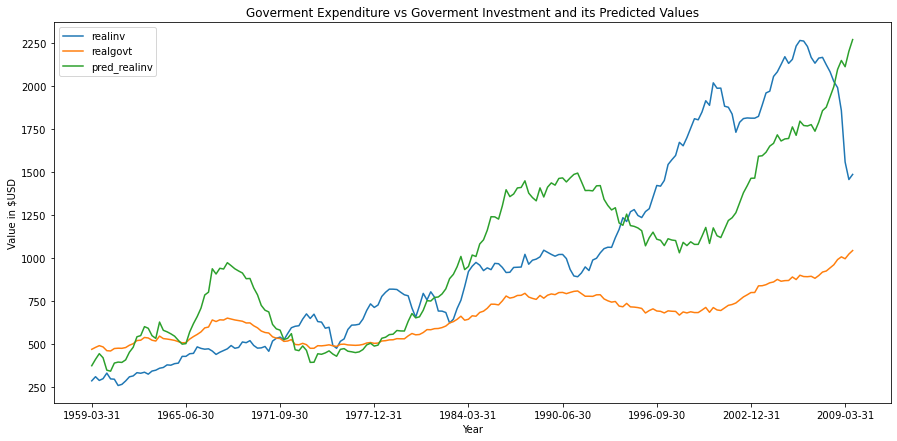

In [42]:
plt.figure(figsize=(20, 10))
index_df[['realinv','realgovt', 'pred_realinv']].plot(figsize=(15, 7))
plt.xlabel('Year')
plt.ylabel('Value in $USD')
plt.title('Goverment Expenditure vs Goverment Investment and its Predicted Values')
plt.legend()
plt.show()

We are trying to predict private domestic investment based on government expenditure. <br>
We can see the prediction values of private domestic investment matches the curve of the actual government expenditure. <br>
There are subtle dips in goverment expenditure where there is a spike in actual government expenses. <br>
From the financial crash, there was a great dip in private domestic investment. <br>
The prediction values fail to capture this dip as they are only considering the government expenditure which had a subtle increase during that period.<br>
The model is therefore <b>Linear</b> in that it follows closely with its Independent X to predict the dependent Y inorder to get the values for the yhat